In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt


plt.rcParams.update(
    {
        "text.usetex": True,
        # "font.family": "Arial",
        "font.size": 12
    }
)
sns.set_palette("colorblind")

### Complete figure

In [2]:
df = pd.read_csv("../assembly/assembly_data.csv")
combs = [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2)]
df = df.rename(columns = {
    "Duplication_ratio": "Duplication_ratio_(\%)",
    "Genome_fraction" : "Recovered_genome_fraction_(\%)",
    "": ""
    })

In [3]:
df["strategy"]= df["strategy"].apply(lambda s: "Coassembly" if s == "group" else s.capitalize())

In [4]:
# Extra formatting for nice plots
df.columns = [i.capitalize() for i in df.columns]
groups = {
    "marine": "marmg",
    "strains": "strmg"
}
df["Group"] = df["Group"].apply(lambda s: groups[s] if s in groups.keys() else "H_" + s)

In [5]:
features = ['Recovered_genome_fraction_(\%)',
            'Largest_contig',            
            'Duplication_ratio_(\%)',
            'Misassembled_contigs_length',
            'num_misassemblies',
            'num_mismatches_per_100_kbp']

(0, 0) Recovered_genome_fraction_(\%)
(0, 1) Largest_contig
(0, 2) Duplication_ratio_(\%)
(1, 0) Misassembled_contigs_length
(1, 1) Num_misassemblies
(1, 2) Num_mismatches_per_100_kbp


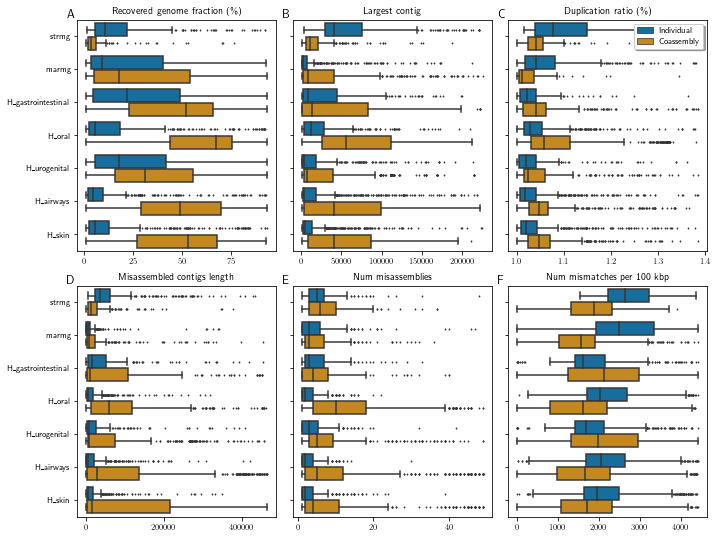

In [6]:
plt.rcParams.update({"font.size": 8})

fig, axs = plt.subplots(2, 3, sharey=True, figsize=(10, 7.5), )

order = df["Group"].value_counts().index[::-1]
cutoff = 0.0
quantile = 0.98

for ax, variable, letter in zip(combs, features, "ABCDEF"):
    variable = variable.capitalize()
    print(ax, variable)
    quantile_cutoff = df[variable].quantile(quantile)
    sns.boxplot(y="Group", x=variable, hue="Strategy", data=df[(df[variable] > (cutoff if variable not in ["Duplication_ratio_(\%)", "Recovered_genome_fraction_(\%)"] else 1)) &
                                                               (df[variable] < quantile_cutoff)], ax=axs[ax], order=order, hue_order="Individual Coassembly".split(), fliersize=1)
    axs[ax].annotate(letter, xy=(-0.05, 1.01), xycoords="axes fraction", fontsize=12, weight="bold")
    axs[ax].set_xlabel("")
    axs[ax].set_ylabel("")
    axs[ax].set_title(variable.replace("_", " "))
    if ax != (0, 2):
        axs[ax].get_legend().remove()
    else:
        legend = axs[ax].legend(loc='upper right', shadow=True)    
    for patch in axs[ax].patches:
        r, g, b, a = patch.get_facecolor()
        patch.set_facecolor((r, g, b, 1))
    
fig.tight_layout(pad=1.0)
plt.savefig(f"../figures/Fig5.png", dpi=600,  bbox_inches="tight", )

plt.rcParams.update({"font.size": 12})

(0, 0) Recovered_genome_fraction_(\%)
(0, 1) Largest_contig
(0, 2) Duplication_ratio_(\%)
(1, 0) Misassembled_contigs_length
(1, 1) Num_misassemblies
(1, 2) Num_mismatches_per_100_kbp


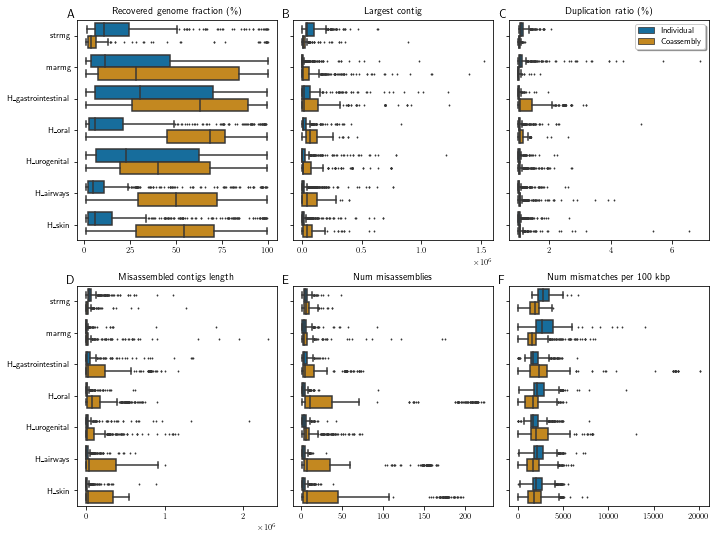

In [7]:
plt.rcParams.update({"font.size": 8})

fig, axs = plt.subplots(2, 3, sharey=True, figsize=(10, 7.5), )

order = df["Group"].value_counts().index[::-1]
cutoff = 0.0
quantile = 1.00

for ax, variable, letter in zip(combs, features, "ABCDEF"):
    variable = variable.capitalize()
    print(ax, variable)
    quantile_cutoff = df[variable].quantile(quantile)
    sns.boxplot(y="Group", x=variable, hue="Strategy", data=df[(df[variable] > (cutoff if variable not in ["Duplication_ratio_(\%)", "Recovered_genome_fraction_(\%)"] else 1)) &
                                                               (df[variable] < quantile_cutoff)], ax=axs[ax], order=order, hue_order="Individual Coassembly".split(), fliersize=1)
    axs[ax].annotate(letter, xy=(-0.05, 1.01), xycoords="axes fraction", fontsize=12, weight="bold")
    axs[ax].set_xlabel("")
    axs[ax].set_ylabel("")
    axs[ax].set_title(variable.replace("_", " "))
    if ax != (0, 2):
        axs[ax].get_legend().remove()
    else:
        legend = axs[ax].legend(loc='upper right', shadow=True)    
    for patch in axs[ax].patches:
        r, g, b, a = patch.get_facecolor()
        patch.set_facecolor((r, g, b, 1))
    

fig.tight_layout(pad=1.0)
plt.savefig(f"../figures/FigS1.png", dpi=600,  bbox_inches="tight", )
plt.rcParams.update({"font.size": 12})